In [21]:
import tensorflow as tf

In [22]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [23]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(6, (5, 5), input_shape=(28, 28, 1), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Conv2D(16, (5, 5), activation="relu"),
        tf.keras.layers.MaxPool2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120, activation="relu"),
        tf.keras.layers.Dense(84, activation="relu"),
        tf.keras.layers.Dense(10, activation="relu"),
    ]
)

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

In [33]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [36]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=loss_fn, metrics=tf.keras.metrics.SparseCategoricalAccuracy())

In [37]:
model.fit(x_train, y_train, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7284 - sparse_categorical_accuracy: 0.7731
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1723 - sparse_categorical_accuracy: 0.9480
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1115 - sparse_categorical_accuracy: 0.9651
Epoch 4/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0874 - sparse_categorical_accuracy: 0.9726
Epoch 5/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0730 - sparse_categorical_accuracy: 0.9773
Epoch 6/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0621 - sparse_categorical_accuracy: 0.9809
Epoch 7/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0564 - sparse_categorical_accuracy: 0.9822
Epoch 8/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0499 - sparse_categorical_accuracy: 0.9844
Epoch 9/11
1875/1875 [==========

In [38]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0390 - sparse_categorical_accuracy: 0.9865 - 530ms/epoch - 2ms/step


[0.03900613635778427, 0.9865000247955322]

(28, 28, 4)
(28, 28, 1)


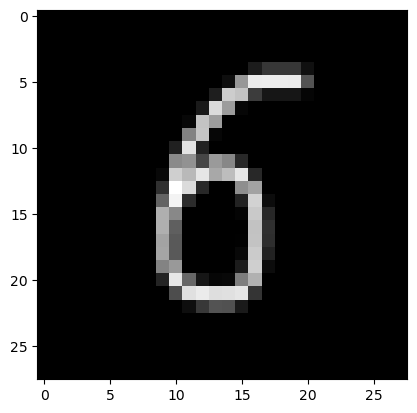

In [68]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

my_image = Image.open("./My images/Zrzut ekranu 2023-11-12 o 02.59.01.png")
my_image = my_image.resize((28, 28))
my_image_array = np.array(my_image)
my_image_to_recognize = my_image_array[:, :, 0].reshape(28, 28, 1)
my_image_to_recognize = (my_image_to_recognize - np.min(my_image_to_recognize)) / (
    np.max(my_image_to_recognize) - np.min(my_image_to_recognize)
)
my_image_to_recognize = 1 - my_image_to_recognize
print(my_image_array.shape)
print(my_image_to_recognize.shape)
plt.imshow(my_image_to_recognize.squeeze(), cmap="gray")
image_tensor = tf.convert_to_tensor(my_image_to_recognize)

In [69]:
y_pred = model.predict(tf.expand_dims(image_tensor,0))
y_pred

1/1 [==============================] - 0s 13ms/step


array([[2.2723591, 0.       , 0.       , 0.       , 0.       , 5.0081873,
        6.162976 , 0.       , 2.1875772, 0.0337656]], dtype=float32)

In [70]:
np.argmax(y_pred)

6